# Train set visualization (Chactun)


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Visualize a tile

[ WARN:0@0.206] global loadsave.cpp:248 findDecoder imread_('raw_data/train_data/train_lidar/tile_0_lidar.tif'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

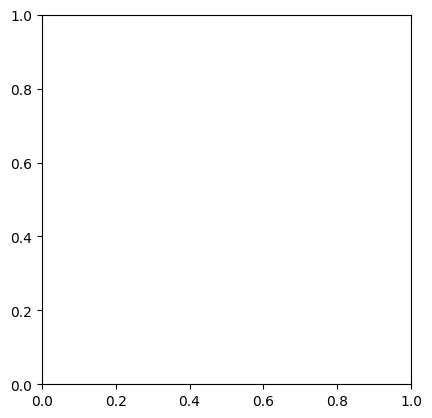

In [3]:
#Load tif file
path = 'raw_data/train_data/train_lidar/tile_0_lidar.tif'
img = cv2.imread(path)
plt.imshow(img)

## Visualize a tile and masks

In [ ]:
path_image = 'raw_data/train_data/train_lidar/tile_0_lidar.tif'
path_aguada = 'raw_data/train_data/train_masks/tile_0_mask_aguada.tif'
path_building = 'raw_data/train_data/train_masks/tile_0_mask_building.tif'
path_platform = 'raw_data/train_data/train_masks/tile_0_mask_platform.tif'

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

ax0.set_title('Lidar')
image = cv2.imread(path_image)
ax0.imshow(image)

ax1.set_title('aguada mask')
aguada = cv2.imread(path_aguada)
ax1.imshow(aguada)

ax2.set_title('building mask')
building = cv2.imread(path_building)
ax2.imshow(building)

ax3.set_title('platform mask')
platform = cv2.imread(path_platform)
ax3.imshow(platform)

## Create a function to visualize a tile and masks

In [ ]:
def tile_viz(tile_number):
    path_image = f'raw_data/train_data/train_lidar/tile_{tile_number}_lidar.tif'
    path_aguada = f'raw_data/train_data/train_masks/tile_{tile_number}_mask_aguada.tif'
    path_building = f'raw_data/train_data/train_masks/tile_{tile_number}_mask_building.tif'
    path_platform = f'raw_data/train_data/train_masks/tile_{tile_number}_mask_platform.tif'

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

    ax0.set_title('Lidar')
    image = cv2.imread(path_image)
    ax0.imshow(image)

    ax1.set_title('aguada mask')
    aguada = cv2.imread(path_aguada)
    ax1.imshow(aguada)

    ax2.set_title('building mask')
    building = cv2.imread(path_building)
    ax2.imshow(building)

    ax3.set_title('platform mask')
    platform = cv2.imread(path_platform)
    ax3.imshow(platform)

In [ ]:
tile_viz(0)

In [ ]:
tile_viz(10)

In [ ]:
tile_viz(32)

## Visualize a bunch of tiles

In [ ]:
#Visualize 20 first tiles
for i in range(20):
    tile_viz(i)

# Data Augmentation

## Load the data

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

lidar_test_dir = '/home/arturobc1/code/flegoualher/maia/data/train_lidar'
mask_test_dir = '/home/arturobc1/code/flegoualher/maia/data/train_masks'

2023-07-11 22:51:22.259245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 22:51:23.444926: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/arturobc1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/cv2/../../lib64:
2023-07-11 22:51:23.444991: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-11 22:51:23.598287: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plu

In [2]:
def load_data(lidar_dir, mask_dir, img_height=128, img_width=128):
    lidar_images = {}
    mask_images = {'aguada': {}, 'building': {}, 'platform': {}}

    for file in os.listdir(lidar_dir):
        if file.endswith('.tif'):
            img_id = file.split('_')[1]
            img_path = os.path.join(lidar_dir, file)
            image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            resized_image = cv2.resize(image, (img_height, img_width))
            lidar_images[img_id] = resized_image

    for file in os.listdir(mask_dir):
        if file.endswith('.tif'):
            parts = file.split('_')
            img_id = parts[1]
            img_class = parts[3].split('.')[0]
            img_path = os.path.join(mask_dir, file)
            image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            resized_image = cv2.resize(image, (img_height, img_width))
            mask_images[img_class][img_id] = resized_image

    return lidar_images, mask_images

## Do data augmentation function

In [3]:
def augment_data(lidar_images, mask_images):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    lidar_list = list(lidar_images.values())
    lidar_array = np.array(lidar_list)
    datagen.fit(lidar_array)
    augmented_lidar_images_array1 = next(datagen.flow(lidar_array, batch_size=len(lidar_array), shuffle=False))
    augmented_lidar_images_array2 = next(datagen.flow(lidar_array, batch_size=len(lidar_array), shuffle=False))
    
    augmented_lidar_images1 = {k: v for k, v in zip(lidar_images.keys(), augmented_lidar_images_array1)}
    augmented_lidar_images2 = {k: v for k, v in zip(lidar_images.keys(), augmented_lidar_images_array2)}

    augmented_mask_images1 = {k: {} for k in mask_images.keys()}
    augmented_mask_images2 = {k: {} for k in mask_images.keys()}
    for img_class in mask_images:
        mask_list = list(mask_images[img_class].values())
        mask_array = np.array(mask_list)
        datagen.fit(mask_array)
        augmented_mask_images_array1 = next(datagen.flow(mask_array, batch_size=len(mask_array), shuffle=False))
        augmented_mask_images_array2 = next(datagen.flow(mask_array, batch_size=len(mask_array), shuffle=False))
        augmented_mask_images1[img_class] = {k: v for k, v in zip(mask_images[img_class].keys(), augmented_mask_images_array1)}
        augmented_mask_images2[img_class] = {k: v for k, v in zip(mask_images[img_class].keys(), augmented_mask_images_array2)}

    return (augmented_lidar_images1, augmented_mask_images1), (augmented_lidar_images2, augmented_mask_images2)


## Define a fuction to visualize augmentated images

In [4]:
def tile_viz(tile_number, lidar_images, mask_images, augmented_lidar_images1, augmented_mask_images1, augmented_lidar_images2, augmented_mask_images2):
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 18))

    axs[0, 0].set_title('LiDAR')
    axs[0, 0].imshow(lidar_images[tile_number])

    axs[0, 1].set_title('Aguada Mask')
    axs[0, 1].imshow(mask_images['aguada'][tile_number])

    axs[0, 2].set_title('Building Mask')
    axs[0, 2].imshow(mask_images['building'][tile_number])

    axs[0, 3].set_title('Platform Mask')
    axs[0, 3].imshow(mask_images['platform'][tile_number])
    
    axs[1, 0].set_title('Augmented LiDAR 1')
    axs[1, 0].imshow(np.clip(augmented_lidar_images1[tile_number], 0, 255).astype(np.uint8))

    axs[1, 1].set_title('Augmented Aguada Mask 1')
    axs[1, 1].imshow(augmented_mask_images1['aguada'][tile_number])

    axs[1, 2].set_title('Augmented Building Mask 1')
    axs[1, 2].imshow(augmented_mask_images1['building'][tile_number])

    axs[1, 3].set_title('Augmented Platform Mask 1')
    axs[1, 3].imshow(augmented_mask_images1['platform'][tile_number])
    
    axs[2, 0].set_title('Augmented LiDAR 2')
    axs[2, 0].imshow(np.clip(augmented_lidar_images2[tile_number], 0, 255).astype(np.uint8))

    axs[2, 1].set_title('Augmented Aguada Mask 2')
    axs[2, 1].imshow(augmented_mask_images2['aguada'][tile_number])

    axs[2, 2].set_title('Augmented Building Mask 2')
    axs[2, 2].imshow(augmented_mask_images2['building'][tile_number])

    axs[2, 3].set_title('Augmented Platform Mask 2')
    axs[2, 3].imshow(augmented_mask_images2['platform'][tile_number])



In [5]:
lidar_images, mask_images = load_data(lidar_test_dir, mask_test_dir)



In [6]:
(augmented_lidar_images1, augmented_mask_images1), (augmented_lidar_images2, augmented_mask_images2) = augment_data(lidar_images, mask_images)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


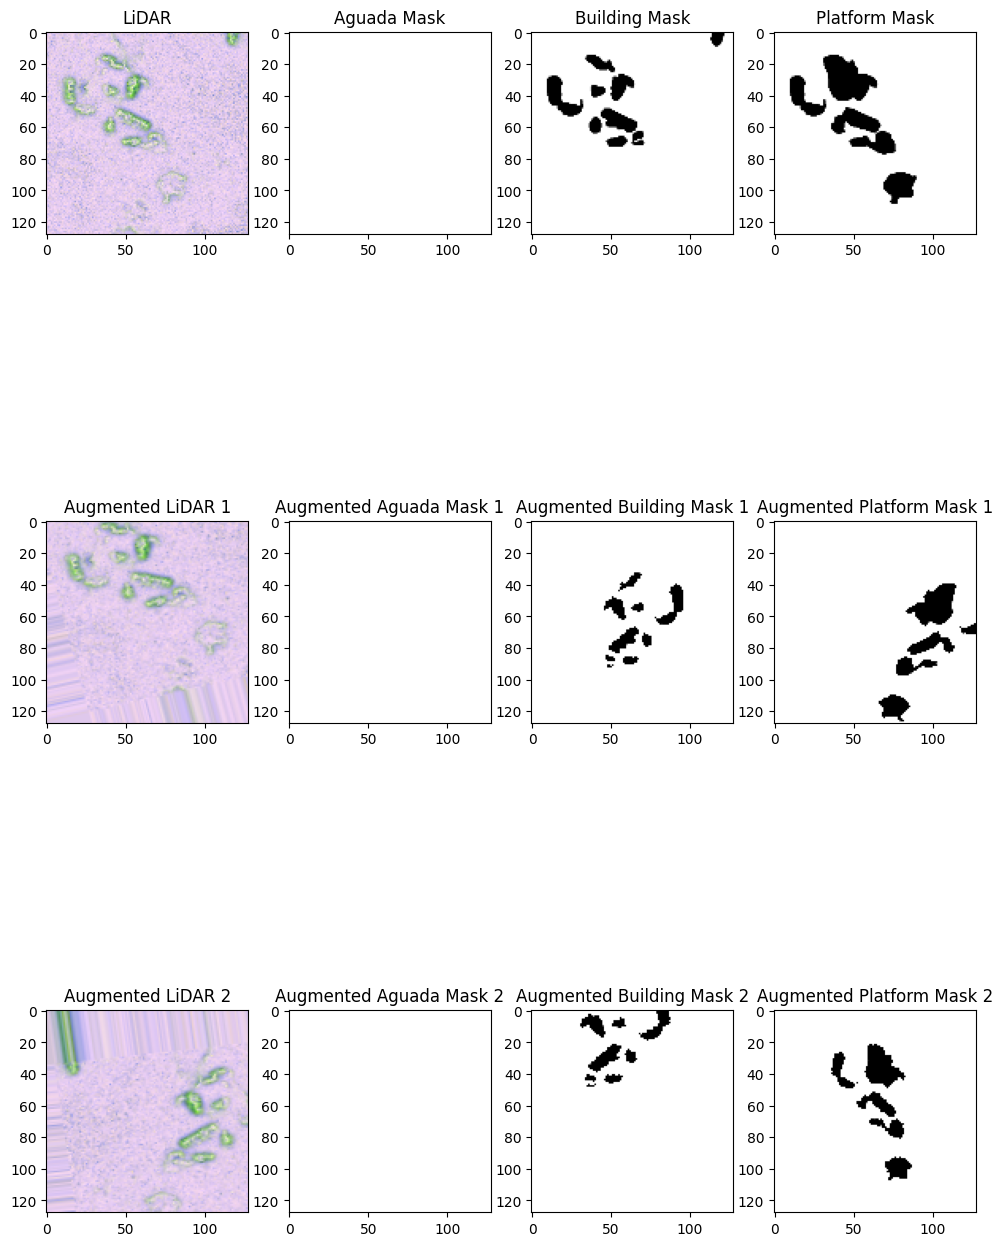

In [7]:
tile_viz('2', lidar_images, mask_images, augmented_lidar_images1, augmented_mask_images1, augmented_lidar_images2, augmented_mask_images2)